# Part I - Prosper Loan Data Exploration 
## by Arthur Ezenwanne 
## Preliminary Wrangling


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [40]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

In [41]:
# high-level overview of data shape and composition
display(df.shape)
display(df.sample(5))

(113937, 81)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
107811,66053547586852871866A53,588010,2012-05-10 15:54:51.343000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-31.46,-338.73,0.00,0.00,0.0,1.0,0,0,0.0,15
95397,C2C83558169137451096E29,639610,2012-09-13 16:21:04.730000000,NaN,60,Current,NaN,0.24682,0.2218,0.2118,...,-156.38,0.00,0.00,0.00,0.0,1.0,0,0,0.0,8
15671,12383590184974490D6560B,911166,2013-09-19 12:02:48,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.94,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
98179,EF5D351413553483847BA56,505532,2011-05-05 12:54:43.207000000,NaN,36,Chargedoff,2013-11-01 00:00:00,0.29510,0.2599,0.2499,...,-98.97,-47.94,3179.58,3179.58,0.0,1.0,0,0,0.0,48
52659,0A7B34151421321816802C5,294299,2008-03-16 19:10:14.020000000,B,36,Defaulted,2009-11-29 00:00:00,0.23397,0.2190,0.2090,...,-85.15,0.00,5288.14,5288.14,0.0,1.0,0,0,0.0,174


In [42]:
# view info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The dataset contains a lot of features which may make it difficult to appropriately show relationships between features. I want to focus my exploration on about 15-20 features of interest. These are features that would aid me in answering some key questions regarding the relationship between loan outcomes, borrower's interest rate, and effect of borrower's eeconomic status such as home owner, employment status, etc on the loan amount.

In [43]:
# select the desired columns subset
cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',  
        'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'IncomeRange', 
        'LoanOriginalAmount', 'LoanOriginationQuarter', 'PercentFunded', 'InvestmentFromFriendsAmount', 'BorrowerState']

In [44]:
# new high-level overview of data shape and composition
df = df[cols]
display(df.shape)
display(df.sample(5))

(113937, 19)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationQuarter,PercentFunded,InvestmentFromFriendsAmount,BorrowerState
110584,36,Current,0.15833,0.1299,0.07490,A,1,Employed,203.0,False,700.0,719.0,0.35,"$50,000-74,999",12000,Q3 2013,1.0000,0.0,TX
59438,36,Completed,0.18470,0.1665,NaN,NaN,0,Not available,NaN,True,620.0,639.0,0.03,Not displayed,1000,Q4 2006,1.0000,0.0,WI
64817,36,Completed,0.30564,0.2900,NaN,NaN,0,Full-time,46.0,False,540.0,559.0,0.16,"$25,000-49,999",2551,Q3 2007,1.0000,0.0,CA
62968,60,Current,0.18555,0.1620,0.07766,C,1,Employed,3.0,False,720.0,739.0,0.27,"$50,000-74,999",5000,Q4 2013,1.0000,0.0,CA
39821,60,Current,0.16519,0.1421,0.09500,A,1,Employed,35.0,True,760.0,779.0,0.21,"$100,000+",18816,Q4 2012,0.7526,0.0,CA


In [45]:
# view data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerAPR                  113912 non-null  float64
 3   BorrowerRate                 113937 non-null  float64
 4   EstimatedReturn              84853 non-null   float64
 5   ProsperRating (Alpha)        84853 non-null   object 
 6   ListingCategory (numeric)    113937 non-null  int64  
 7   EmploymentStatus             111682 non-null  object 
 8   EmploymentStatusDuration     106312 non-null  float64
 9   IsBorrowerHomeowner          113937 non-null  bool   
 10  CreditScoreRangeLower        113346 non-null  float64
 11  CreditScoreRangeUpper        113346 non-null  float64
 12  DebtToIncomeRatio            105383 non-null  float64
 13 

A little wrangling is required of this dataset. Some observed issues include:
1. Some feature names are not uniformly named.
2. Some features contains null values.
3. Some features should be compressed into a single feature column.
4. Some features are better represented as ordinal categorical datatypes while some other features datatypes should be changed.

I will be using the `Define - Code - Test` approach in cleaning the dataset.

### Issue 1 
#### Define
Some feature names are not uniformly named.

Rename feature names containing special characters.

In [46]:
# code
df_clean = df.copy()
df_clean.rename(columns={'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory'}, 
                inplace=True)

In [47]:
# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerAPR                  113912 non-null  float64
 3   BorrowerRate                 113937 non-null  float64
 4   EstimatedReturn              84853 non-null   float64
 5   ProsperRating                84853 non-null   object 
 6   ListingCategory              113937 non-null  int64  
 7   EmploymentStatus             111682 non-null  object 
 8   EmploymentStatusDuration     106312 non-null  float64
 9   IsBorrowerHomeowner          113937 non-null  bool   
 10  CreditScoreRangeLower        113346 non-null  float64
 11  CreditScoreRangeUpper        113346 non-null  float64
 12  DebtToIncomeRatio            105383 non-null  float64
 13 

### Issue 2
#### Define
Some features in the dataset contains null values.

Drop all records that contains null values.

(I understand that in a real work environment it may be more expedient to understand why we have such a large number of null values and then find an innovative way of fixing such. But for this project, I will assume that it is impossible to get the missing data and that dropping null records instead of inputation or any other method for treating null values would not adversely affect my work) 

In [48]:
# code
df_clean.dropna(inplace=True)

# ListingCategory of 0 means that the listing has no specified category (about 19 have listing == 0; would drop them) 
df_clean[df_clean.ListingCategory == 0].count()

Term                           19
LoanStatus                     19
BorrowerAPR                    19
BorrowerRate                   19
EstimatedReturn                19
ProsperRating                  19
ListingCategory                19
EmploymentStatus               19
EmploymentStatusDuration       19
IsBorrowerHomeowner            19
CreditScoreRangeLower          19
CreditScoreRangeUpper          19
DebtToIncomeRatio              19
IncomeRange                    19
LoanOriginalAmount             19
LoanOriginationQuarter         19
PercentFunded                  19
InvestmentFromFriendsAmount    19
BorrowerState                  19
dtype: int64

In [49]:
# drop all records with a ListingCategory of 0 
df_clean = df_clean[df_clean.ListingCategory != 0]

In [50]:
# test
display(df_clean[df_clean.ListingCategory == 0])
df_clean.info()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationQuarter,PercentFunded,InvestmentFromFriendsAmount,BorrowerState


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77524 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Term                         77524 non-null  int64  
 1   LoanStatus                   77524 non-null  object 
 2   BorrowerAPR                  77524 non-null  float64
 3   BorrowerRate                 77524 non-null  float64
 4   EstimatedReturn              77524 non-null  float64
 5   ProsperRating                77524 non-null  object 
 6   ListingCategory              77524 non-null  int64  
 7   EmploymentStatus             77524 non-null  object 
 8   EmploymentStatusDuration     77524 non-null  float64
 9   IsBorrowerHomeowner          77524 non-null  bool   
 10  CreditScoreRangeLower        77524 non-null  float64
 11  CreditScoreRangeUpper        77524 non-null  float64
 12  DebtToIncomeRatio            77524 non-null  float64
 13  IncomeRange    

### Issue 3
#### Define
Some features should be compressed into a single feature column.

Combine `CreditScoreRangeUpper` and `CreditScoreRangeLower` features into a single feature column `CreditScoreRange` that should be an ordered categorial datatype

In [51]:
# code
# view the range of values
print(df_clean.CreditScoreRangeLower.sort_values().unique())
print(df_clean.CreditScoreRangeUpper.sort_values().unique())

# convert the dtype to int so as to remove the floting point zeros
df_clean = df_clean.astype({'CreditScoreRangeLower':'int', 'CreditScoreRangeUpper':'int'})

# convert the dtype to str so as to better join the values
df_clean = df_clean.astype({'CreditScoreRangeLower':'str', 'CreditScoreRangeUpper':'str'})

# create a new feature by
df_clean['CreditScoreRange'] = df_clean.CreditScoreRangeLower + '-' + df_clean.CreditScoreRangeUpper

# drop the base columns
df_clean.drop(labels=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

[600. 620. 640. 660. 680. 700. 720. 740. 760. 780. 800. 820. 840. 860.
 880.]
[619. 639. 659. 679. 699. 719. 739. 759. 779. 799. 819. 839. 859. 879.
 899.]


In [52]:
# test
display(df_clean.head(2))
df_clean.info()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,LoanOriginationQuarter,PercentFunded,InvestmentFromFriendsAmount,BorrowerState,CreditScoreRange
1,36,Current,0.12016,0.0920,0.0547,A,2,Employed,44.0,False,0.18,"$50,000-74,999",10000,Q1 2014,1.0,0.0,CO,680-699
3,36,Current,0.12528,0.0974,0.0600,A,16,Employed,113.0,True,0.15,"$25,000-49,999",10000,Q4 2012,1.0,0.0,GA,800-819


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77524 entries, 1 to 113936
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Term                         77524 non-null  int64  
 1   LoanStatus                   77524 non-null  object 
 2   BorrowerAPR                  77524 non-null  float64
 3   BorrowerRate                 77524 non-null  float64
 4   EstimatedReturn              77524 non-null  float64
 5   ProsperRating                77524 non-null  object 
 6   ListingCategory              77524 non-null  int64  
 7   EmploymentStatus             77524 non-null  object 
 8   EmploymentStatusDuration     77524 non-null  float64
 9   IsBorrowerHomeowner          77524 non-null  bool   
 10  DebtToIncomeRatio            77524 non-null  float64
 11  IncomeRange                  77524 non-null  object 
 12  LoanOriginalAmount           77524 non-null  int64  
 13  LoanOrigination

### Issue 4
#### Define
Some features are better represented as ordinal categorical datatypes while some other features datatypes should be changed.

Change the following features `Term`, `ProsperRating`, `ListingCategory`, `LoanStatus`, `EmploymentStatus`, `CreditScoreRange`, `IncomeRange`, `LoanOriginationQuarter` into categorical datatype. Also update the datatype of `EmploymentStatusDuration` from `float` to `int`.

In [53]:
# code
# convert to categorical
def convert_to_cat(a, b=True):
    '''
    Converts columns to categorical columns from a given dict
    
    Args:
    a: dict containing cols to be converted to categorical datatype
    b: status of the conversion if ordered or not
    
    Returns:
    None
    '''
    for var in a:
        ordered_var = CategoricalDtype(ordered=b, categories=a[var])
        df_clean[var] = df_clean[var].astype(ordered_var)
    

In [54]:
# convert Term, ProsperScore, ProsperRating, CreditScoreRange, IncomeRange, and LoanOriginationQuarter
# into ordered categorical types

# change ListingCategory numerical values to their corresponding textual representation
df_clean.ListingCategory = df_clean.ListingCategory.replace({1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 
                                                             4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 
                                                             8:'Baby & Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                                                             11:'Engagement Ring', 12:'Green Loans', 
                                                             13:'Household Expenses', 14:'Large Purchases', 
                                                             15:'Medical Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 
                                                             19:'Vacation', 20:'Wedding Loans'})

# convert Term to a str data since I am not performing calculations on the terms and would be converting it to categorical
df_clean = df_clean.astype({'Term':'str'})

# choose the columns to be ordered and unordered categorical variables
ordinal_var_dict = {'Term': ['12', '36', '60'],
                    'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'CreditScoreRange': ['600-619', '620-639', '640-659', '660-679', '680-699', '700-719', '720-739',
                                         '740-759', '760-779', '780-799', '800-819', '820-839', '840-859', '860-879',
                                         '880-899'],
                    'IncomeRange': ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                                    '$100,000+'],
                    'LoanOriginationQuarter': ['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011',
                                               'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
                                               'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']}
convert_to_cat(ordinal_var_dict)

# convert ListingCategory, EmploymentStatus, and LoanStatus into nominal categorical types
nominal_var_dict = {'ListingCategory': ['Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan',
                                             'Student Use', 'Auto', 'Other', 'Baby & Adoption', 'Boat', 
                                             'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
                                             'Household Expenses', 'Large Purchases', 'Medical Dental', 
                                             'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'],
                    'EmploymentStatus': ['Employed', 'Full-time', 'Not employed', 'Other', 'Part-time', 
                                         'Retired', 'Self-employed'],
                    'LoanStatus': ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress',
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']}
convert_to_cat(nominal_var_dict, False)

# convert the EmploymentStatusDuration dtype to int so as to remove the floting point zeros
df_clean = df_clean.astype({'EmploymentStatusDuration':'int64'})

# reset the index
df_clean.reset_index(drop=True, inplace=True)

In [55]:
# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77524 entries, 0 to 77523
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Term                         77524 non-null  category
 1   LoanStatus                   77524 non-null  category
 2   BorrowerAPR                  77524 non-null  float64 
 3   BorrowerRate                 77524 non-null  float64 
 4   EstimatedReturn              77524 non-null  float64 
 5   ProsperRating                77524 non-null  category
 6   ListingCategory              77524 non-null  category
 7   EmploymentStatus             77524 non-null  category
 8   EmploymentStatusDuration     77524 non-null  int64   
 9   IsBorrowerHomeowner          77524 non-null  bool    
 10  DebtToIncomeRatio            77524 non-null  float64 
 11  IncomeRange                  77524 non-null  category
 12  LoanOriginalAmount           77524 non-null  int64   
 13  L

### What is the structure of your dataset?
This cleaned dataset contains 77,524 non null records and 18 features. The features contains 8 `categorical` datatypes, 6 `float` datatypes, and 2 `int` datatypes, 1 `str` datatype, and 1 `bool` datatype.

### What is/are the main feature(s) of interest in your dataset?
Since the dataset contains a large number of features, I am interested in evaluating the relationship between about 15-20 of the features; with a view of understanding the features that most likely affects the loan outcome, the borrower's interest rate, and the loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the credit and rating scores, and economic status (i.e.; employment status, home ownership, debt-to-income etc) would be pivotal in determining a loan outcome, borrower's interest rate, and loan amount.

## Univariate Exploration


To start off, I would like to understand how the loan duration for each loan is distributed. What is the most frequent loan term?

In [56]:
# base color to use in my seaborn visuals
palette_base = sb.color_palette('pastel')

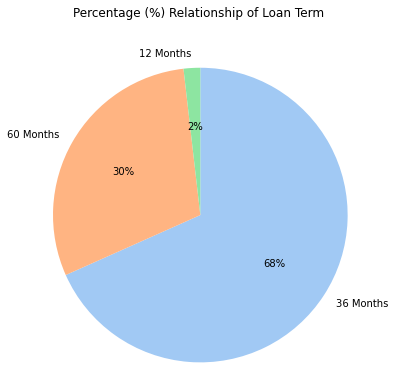

In [57]:
# plot a pie chart to look at the loan term distribution
# sort the data in order
sorted_data = df_clean.Term.value_counts()

# plot the data
plt.pie(x=sorted_data, labels=['36 Months', '60 Months', '12 Months'], startangle=90, counterclock=False, 
        autopct='%.0f%%', colors=palette_base)
plt.axis('square')

plt.title('Percentage (%) Relationship of Loan Term \n\n')
plt.show();

From the pie chart above we can clearly see that __*68%*__ of the loan terms was for __*36*__ months. No loans was more than __*60*__ months while __*2%*__ of the loans had a term of __*12*__ months only.

Next I want to consider the distribution for the loan status. How many are defaulted, completed, or just written off?

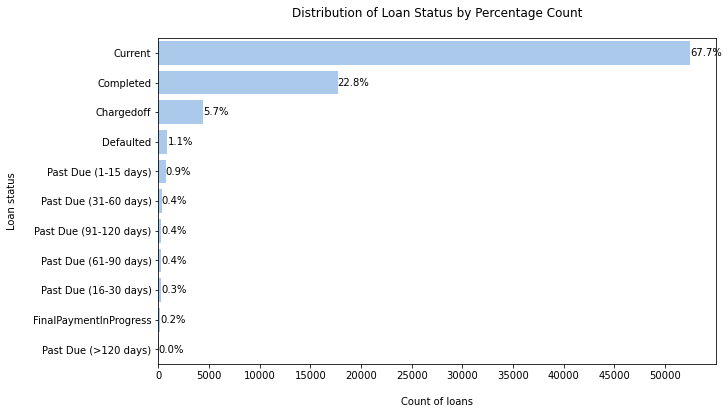

In [58]:
# get the proportions
n_loan_status = df_clean.LoanStatus.value_counts().sum()
type_counts = df_clean.LoanStatus.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# get the freq to order the heights for ordinal categorical data
freq = df_clean.LoanStatus.value_counts().index

# plot a bar chart to look at the loan term distribution using the proportion of the LoanStatus
sb.countplot(data=df_clean, y='LoanStatus', color=palette_base[0], order=freq)

# print proportion values on the bars
for i in range(len(type_counts)):
    count = type_counts[i]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar
    plt.text(count+2, i, pct_str, va='center')

# 
plt.xticks(range(0, 55000, 5000))
plt.ylabel('Loan status\n')
plt.xlabel('\nCount of loans')
plt.title('Distribution of Loan Status by Percentage Count\n')
plt.show();

Here we see that the majority of the loans are currently ongoing with over __*67%*__ while over __*23%*__ of the loans have been completed. It is also worthwhile to see that only a small proportion of the Prosper loans are either in default, past due or written off. These bad loans are less than __*10%*__ of the total loans disbursed.

Since a very low percentage of the loan status are bad loans, I want to look at the credit and risk scores, economic status, and interest rate values.

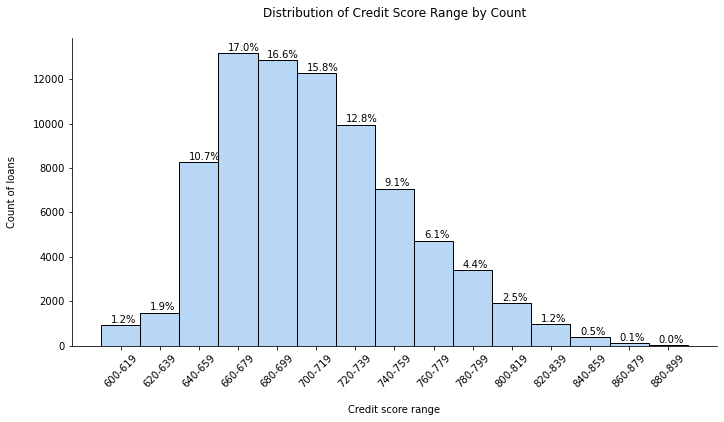

In [59]:
# plot a chart to look at credit score range using the proportion of occurance
# get the proportions
n_loan_status = df_clean.CreditScoreRange.value_counts().sum()
type_counts = df_clean.CreditScoreRange.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(df_clean.CreditScoreRange, color=palette_base[0], height=5, aspect=2).set_xticklabels(rotation=45)

ordered_cat = ['600-619', '620-639', '640-659', '660-679', '680-699', '700-719', '720-739', '740-759', '760-779', 
               '780-799', '800-819', '820-839', '840-859', '860-879', '880-899']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.25, count+100, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nCredit score range')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Credit Score Range by Count\n')

plt.show();

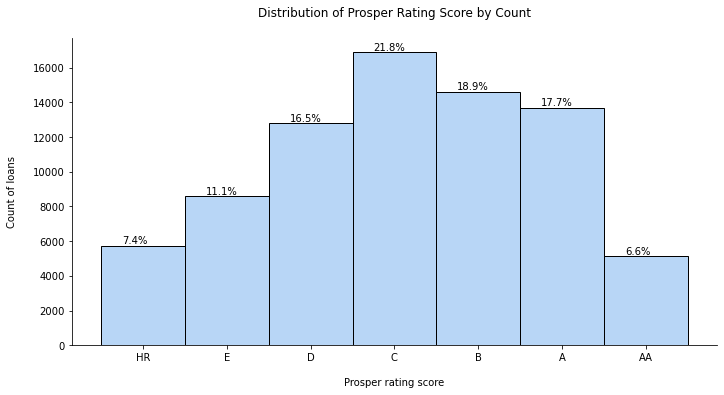

In [60]:
# plot a chart to look at credit score range using the proportion of occurance
# get the proportions
n_loan_status = df_clean.ProsperRating.value_counts().sum()
type_counts = df_clean.ProsperRating.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(df_clean.ProsperRating, color=palette_base[0], height=5, aspect=2)

ordered_cat = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.25, count+100, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nProsper rating score')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Prosper Rating Score by Count\n')

plt.show();

From the above two charts for `ProsperRating` and `CreditScoreRange` we see that these features are normally distributed. We could clearly see that over __*74%*__ of disbursed loans were given to clients with `ProsperRating` grade between __*D*__ and __*A*__ (inclusive). This also translated to a highly corelated relationship with the `CreditScoreRange` where we see over __*80%*__ of the disbursed loans went to users whose credit range scores was between __*640-759*__. The data for the `CreditScoreRange` also suggests that a sizable number (about __*15%*__) of disbursed loans were given to users with above average credit scores, while less than __*4%*__ of disbursed loans were given to users with a low credit score.

So the previously observed low default and bad loans numbers may be due to Prosper majorly giving their loans to users with very good credit. This may warrant further study as we take a look at the economic status of each loan application. This should give us an insight into what class of users are more likely to have their application approved. We would be considering the `EmploymentStatus`, `EmploymentStatusDuration`, `DebtToIncomeRatio`, `IncomeRange`, and `IsBorrowerHomeowner` features.

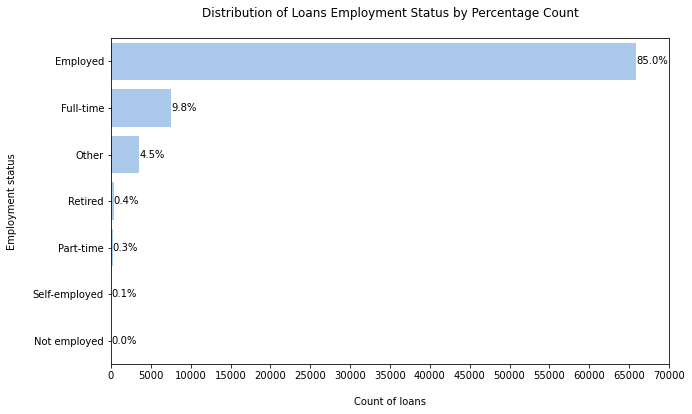

In [61]:
# plot a chart to look at EmploymentStatus distribution
# get the proportions
n_loan_status = df_clean.EmploymentStatus.value_counts().sum()
type_counts = df_clean.EmploymentStatus.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# get the freq to order the heights
freq = df_clean.EmploymentStatus.value_counts().index

# plot a bar chart to look at the loan term distribution using the proportion of the EmploymentStatus
sb.countplot(data=df_clean, y='EmploymentStatus', color=palette_base[0], order=freq)

# print proportion values on the bars
for i in range(len(type_counts)):
    count = type_counts[i]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar
    plt.text(count+2, i, pct_str, va='center')

# 
plt.xticks(range(0, 75000, 5000))
plt.ylabel('Employment status\n')
plt.xlabel('\nCount of loans')
plt.title('Distribution of Loans Employment Status by Percentage Count\n')
plt.show();

Interestingly, over _**99%**_ of disbursed loans went to applicants that are `Employed`, `Fully Employed`, or have some `Other` type of recognizable employment. I am intrigued to take a further look at the `EmploymentStatusDuration`. Does loans go to applicants with more or less time in paid employment?

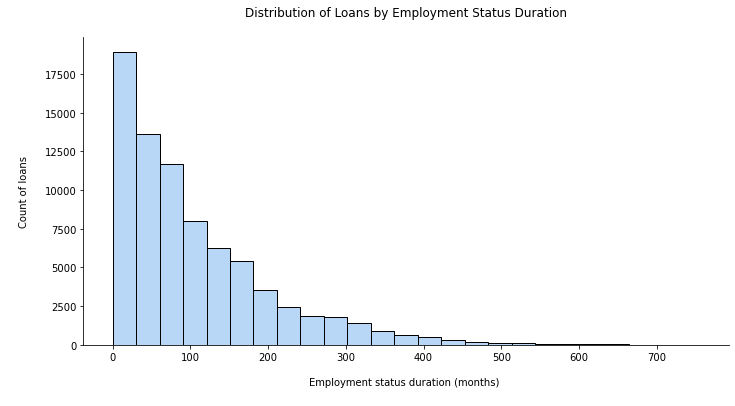

In [62]:
# plot a chart to look at EmploymentStatusDuration distribution
sb.displot(df_clean.EmploymentStatusDuration, color=palette_base[0], bins=25, height=5, aspect=2)

# 
plt.xlabel('\nEmployment status duration (months) \n')
plt.ylabel('\nCount of loans\n')
plt.title('Distribution of Loans by Employment Status Duration\n')
plt.show();

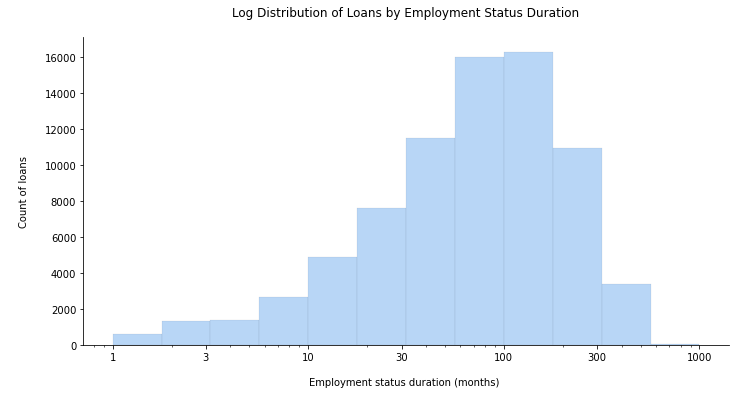

In [63]:
# there's a long right tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.25
bins = 10 ** np.arange(0.0, np.log10(df_clean.EmploymentStatusDuration.max())+log_binsize, log_binsize)

# make the plots
sb.displot(df_clean.EmploymentStatusDuration, color=palette_base[0], bins=bins, height=5, aspect=2)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000], [1, 3, 10, 30, 100, 300, 1000])

# 
plt.xlabel('\nEmployment status duration (months) \n')
plt.ylabel('\nCount of loans\n')
plt.title('Log Distribution of Loans by Employment Status Duration\n')
plt.show();

The distribution show that the data is now normal shaped with a slight left skew. This shows that more loans actually go to applicants with `EmploymentStatusDuration` between __*10 - 300*__ months.

Thus, applicants that have been employed for longer either gets lower approval for loans or they do not even apply for as much loans as others.

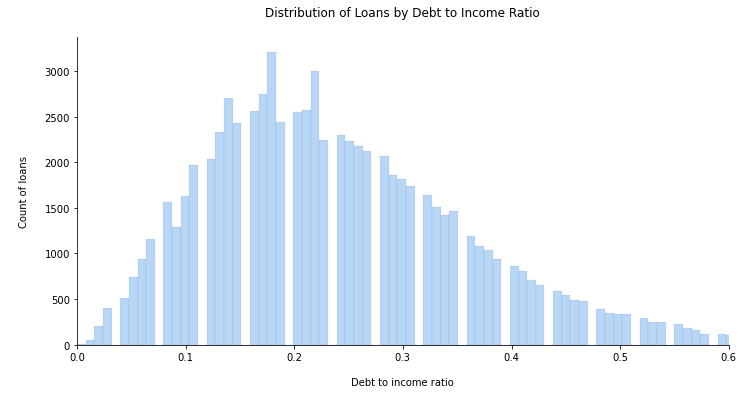

In [64]:
# next we take a look at the dataset's DebtToIncomeRatio
# the data for that column looks to have lots of outlier values
# so I ploted it with an axis limit of (0.0, 0.6)

sb.displot(df_clean.DebtToIncomeRatio, color=palette_base[0], height=5, aspect=2)
plt.xlim(0, 0.6)

# 
plt.xlabel('\nDebt to income ratio\n')
plt.ylabel('\nCount of loans\n')
plt.title('Distribution of Loans by Debt to Income Ratio\n')
plt.show();

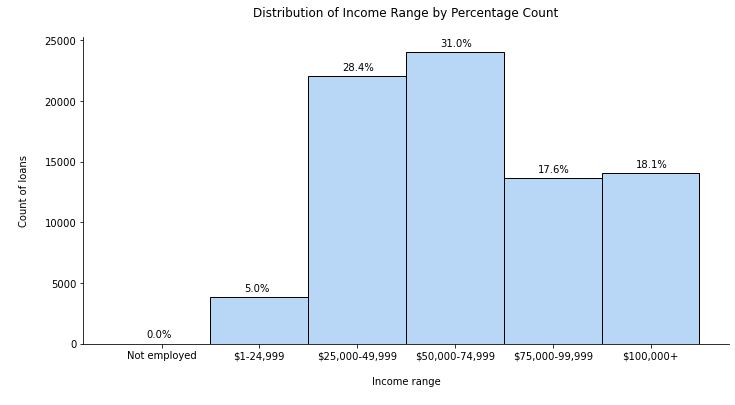

In [65]:
# plot a bar chart to look at income range for each loan using the proportion of occurance
# get the proportions
n_loan_status = df_clean.IncomeRange.value_counts().sum()
type_counts = df_clean.IncomeRange.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(data=df_clean, x='IncomeRange', color=palette_base[0], height=5, aspect=2)
ordered_cat = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.15, count+500, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nIncome range\n')
plt.ylabel('\nCount of loans\n')
plt.title('Distribution of Income Range by Percentage Count\n')
plt.show();

Great. We can clearly see that approximately __*95%*__ of Prosper loans were given to applicants with an `IncomeRange` above __*$24,999*__.

We will now take a look at the distribution of the `BorrowerRate` and borrower `EstimatedReturn` to see how diverse interest rate and ROI for each loan is distributed.

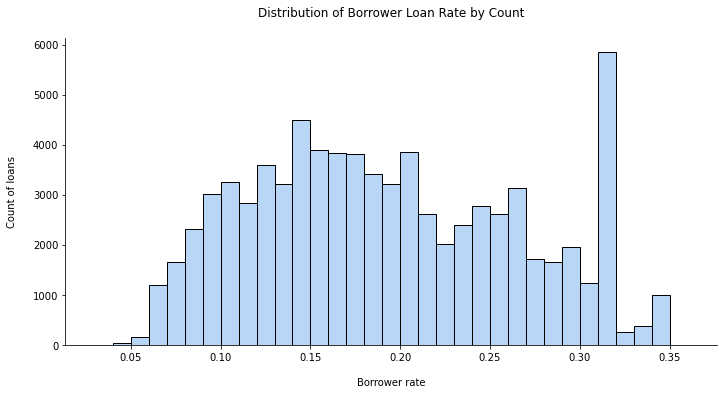

In [66]:
# plot a histogram to look at the loan borrower rate distribution 
bins_edges = np.arange(0.03, df_clean.BorrowerRate.max()+0.01, 0.01)
sb.displot(df_clean.BorrowerRate, bins=bins_edges, color=palette_base[0], height=5, aspect=2)

# 
plt.xlabel('\nBorrower rate')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Borrower Loan Rate by Count\n')

plt.show();

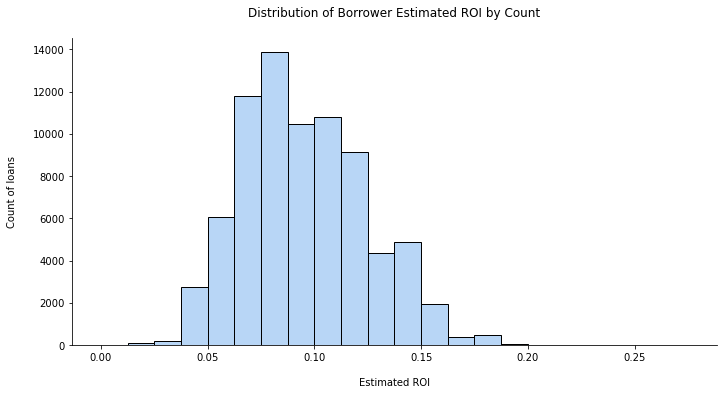

In [67]:
# plot a histogram to look at the borrower EstimatedReturn distribution 
bins_edges = np.arange(0.0, df_clean.EstimatedReturn.max()+0.0125, 0.0125)
sb.displot(df_clean.EstimatedReturn, bins=bins_edges, color=palette_base[0], height=5, aspect=2)

# 
plt.xlabel('\nEstimated ROI')
plt.ylabel('Count of loans\n')
plt.title('Distribution of Borrower Estimated ROI by Count\n')

plt.show();

The data for `BorrowerRate` and `EstimatedReturn` is fairly uniformly distributed and correlated. However, we can see that the some data point for `BorrowerRate` between __*0.31*__ and __*0.32*__ seems to contain outliers. I may need to take further look at this.

I now want to take a look at how the loan `ListingCategory` are distributed. Most loans was for what precisely?

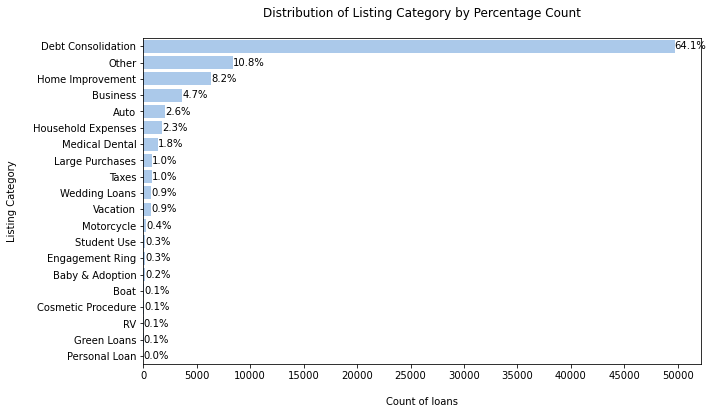

In [68]:
# plot a barchart to look at loan ListingCategory distribution
# get the proportions
n_loan_status = df_clean.ListingCategory.value_counts().sum()
type_counts = df_clean.ListingCategory.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# get the freq to order the heights
freq = df_clean.ListingCategory.value_counts().index

# plot a bar chart to look at the loan ListingCategory using the proportion of the EmploymentStatus
sb.countplot(data=df_clean, y='ListingCategory', color=palette_base[0], order=freq)

# print proportion values on the bars
for i in range(len(type_counts)):
    count = type_counts[i]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar
    plt.text(count+2, i, pct_str, va='center')

# 
plt.xticks(range(0, 55000, 5000))
plt.ylabel('Listing Category\n')
plt.xlabel('\nCount of loans')
plt.title('Distribution of Listing Category by Percentage Count\n')
plt.show();

Interestingly, __*64%*__ of the loans were given to applicants that had a category of `Debt Consolidation`. Seems like Prosper gives more loans to cover more loans. It also seems that Prosper majorly gives personal, household loans since only __*4.7%*__ of its loans went to the business category.

Moving on, were there duration in which more loans were disbursed? Let's take a look at the `LoanOriginationQuarterusing` to help us answer that question.

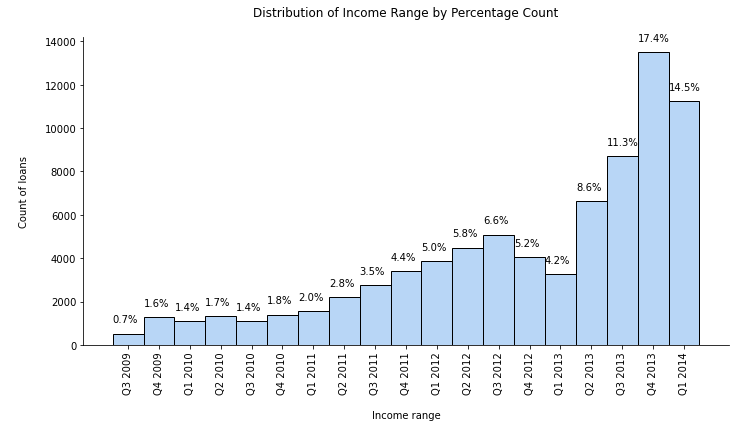

In [69]:
# plot a bar chart to look at LoanOriginationQuarterusing the proportion of occurance
# get the proportions
n_loan_status = df_clean.LoanOriginationQuarter.value_counts().sum()
type_counts = df_clean.LoanOriginationQuarter.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# plot the chart
sb.displot(data=df_clean, x='LoanOriginationQuarter', color=palette_base[0], height=5, 
           aspect=2).set_xticklabels(rotation=90)
ordered_cat = ['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 
               'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012', 'Q1 2013', 'Q2 2013', 
               'Q3 2013', 'Q4 2013', 'Q1 2014']
counter = 0

# write the text on each bar
for var in ordered_cat:
    count = type_counts[var]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar 
    plt.text(counter-0.5, count+500, pct_str, va='baseline')
    counter = counter + 1                                  # helps in writing the texts on the x-asis

# 
plt.xlabel('\nIncome range\n')
plt.ylabel('\nCount of loans\n')
plt.title('Distribution of Income Range by Percentage Count\n')
plt.show();

For the period under consideration, the __*Q4*__ has always had more loans disbursed than the preceeding quarters, except for the __*Q4 2012*__ where we had a lower number of loans disbursed. We also see that from __*2013*__, the amount of loans disbursed has increased more than in preceeding years.

Finally, I will take a look at the homeownership of the applicants and the amount of loans disbursed.

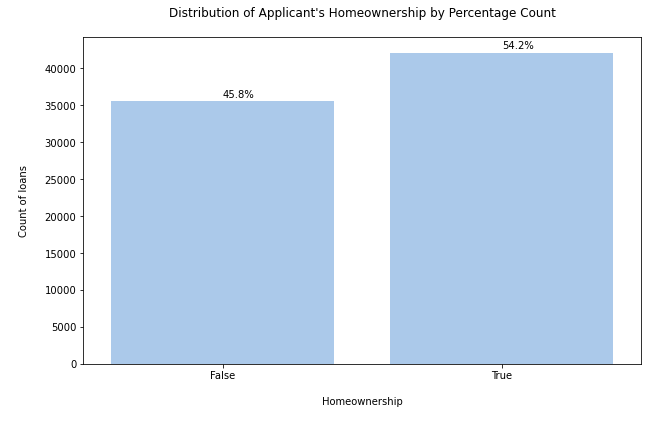

In [70]:
# get the proportions
n_loan_status = df_clean.IsBorrowerHomeowner.value_counts().sum()
type_counts = df_clean.IsBorrowerHomeowner.value_counts()
max_loan_status = type_counts[0] / n_loan_status

# get the freq to order the heights for ordinal categorical data
freq = df_clean.IsBorrowerHomeowner.value_counts().index

# plot a bar chart to look at the loan term distribution using the proportion of the LoanStatus
sb.countplot(data=df_clean, x='IsBorrowerHomeowner', color=palette_base[0])

# print proportion values on the bars
for i in range(len(type_counts)):
    count = type_counts[i]
    # convert count into a str percentage
    pct_str = '{:0.1f}%'.format(100*count/n_loan_status)
    # print the value on the bar
    plt.text(i, count+1000, pct_str, va='center')

# plt.xticks(range(0, 55000, 5000))
plt.xlabel('\nHomeownership\n')
plt.ylabel('\nCount of loans\n')
plt.title("Distribution of Applicant's Homeownership by Percentage Count\n")
plt.show();

We see from the data for `IsBorrowerHomeowner` that __*54.2%*__ of applicants are homeowners, while __*45.8%*__ are not. So a larger percentage of applicants are home owners but not by much.

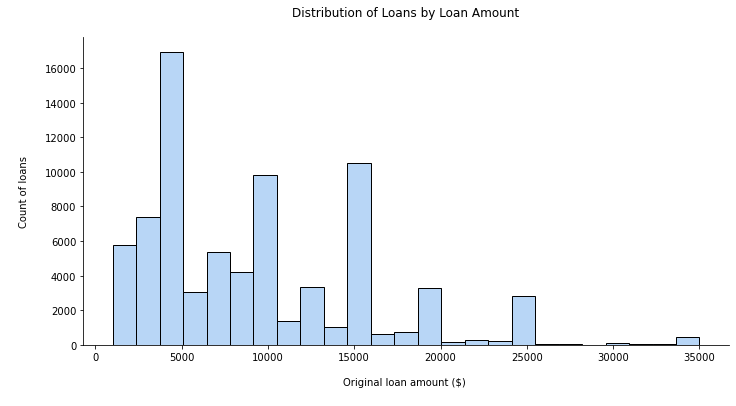

In [71]:
# plot a chart to look at EmploymentStatusDuration distribution
sb.displot(df_clean.LoanOriginalAmount, color=palette_base[0], bins=25, height=5, aspect=2)

# 
plt.xlabel("\nOriginal loan amount ($) \n")
plt.ylabel('\nCount of loans\n')
plt.title('Distribution of Loans by Loan Amount\n')
plt.show();

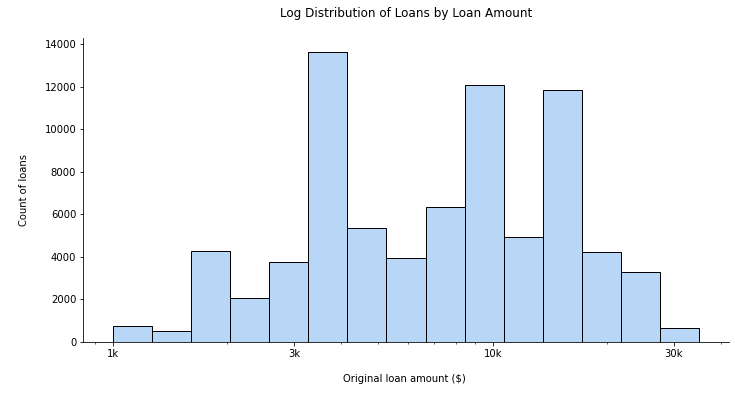

In [72]:
# there's a long right tail in the distribution, so let's put it on a log scale instead
# make the plots
sb.displot(df_clean.LoanOriginalAmount, color=palette_base[0], bins=15, height=5, aspect=2, log_scale=True)
plt.xticks([1e3, 3e3, 1e4, 3e4], ['1k', '3k', '10k', '30k'])

# 
plt.xlabel("\nOriginal loan amount ($) \n")
plt.ylabel('\nCount of loans\n')
plt.title('Log Distribution of Loans by Loan Amount\n')
plt.show();

We see that the data is tri-modal around __*4k*__, __*10k*__, and __*15k*__. We also can see that appoved loans are usually within the __*3k*__ ~ __*25k*__ range.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
From the data we clearly observed that the data for `BorrowerRate` and `EstimatedReturn` is fairly uniformly distributed and correlated. However, we can see that the some data point for `BorrowerRate` between __*0.31*__ and __*0.32*__ seems to contain outliers.

Our group of economic indicators such as `EmploymentStatus`, `EmploymentStatusDuration`, `IsBorrowerHomeowner`, `IncomeRange`, etc shows that most loans were given to individuals that are employed and have been employed for about __*10*__ ~ __*300*__ months. Approved loan disbursements also showed that a larger percentage of the loans were given to applicants that are home owners with an `IncomeRange` above __*25,000 USD*__. 

Our `LoanOriginalAmount` feature is tri modal and I performed a log transformation on it to show that the modal amounts were clustered around the __*4k*__, __*10k*__, and __*15k*__ ranges. We also can see that appoved loans are usually within the __*3k*__ ~ __*25k*__ range.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Using the `Define - Code - Test` approach I cleaned and tidied the dataset by performing the following:
* Renaming feature names that are not uniformly named.
* Removing observations that contains null values.
* Merged the credit range lower and upper features into a single categorical feature.
* Updated the datatypes of some features as required.

I also changed the `ListingCategory` values from numeric into their textual representation for better readability. 

From the features, I observed that most loans was for debt consolidation, while all bad loans accounted for less than __*10%*__ of the total loans. It was also intriguing to see that in each financial year, more loans were disbursed in the __*4th*__ quarters than in preceeding quarters except for the Year __*2012*__. The `EmploymentStatusDuration` data was right skwed, but a log transformation showed that less loans were given to individuals with high `EmploymentStatusDuration` values. A large proportion of the loans have a duration of __*36*__ months and above __*67%*__ of the loans are currently running.

## Bivariate Exploration

To reduce overplotting of datapoints in bivarate and multivarate plots I selected a random subset of the data for plotting.

In [73]:
np.random.seed(2022)

# make random subsets
sample_1000 = np.random.choice(df_clean.shape[0], 1000, replace=False)
df_clean_subset = df_clean.loc[sample_1000]

In [74]:
# seperate my features of interest into numeric and categorical datatypes
categorical_features = ['Term', 'ProsperRating', 'CreditScoreRange', 'IncomeRange', 'LoanOriginationQuarter', 
                        'ListingCategory', 'EmploymentStatus', 'LoanStatus']
numerical_features = ['BorrowerAPR', 'BorrowerRate', 'EstimatedReturn', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                      'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded', 'InvestmentFromFriendsAmount']

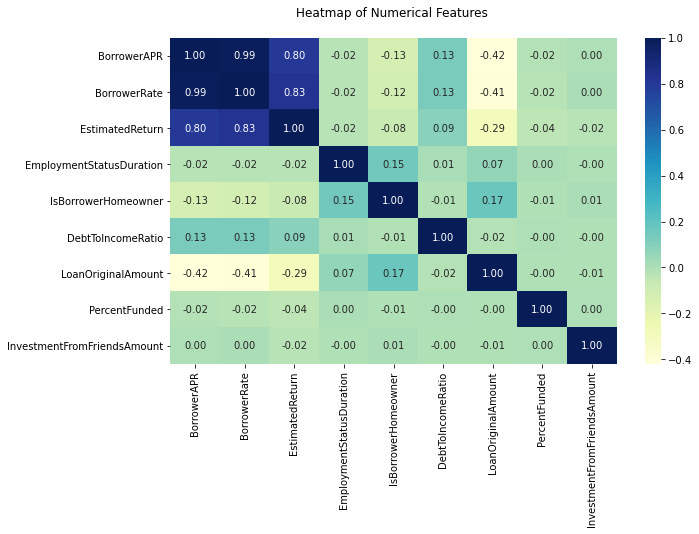

In [75]:
# plot a basic heatmap for the numeric features
sb.heatmap(df_clean.corr(), annot=True, fmt='.2f', cmap='YlGnBu');

# 
plt.title('Heatmap of Numerical Features \n')
plt.show();

First off, lets take a look at how the rate varies wrt the applicant's economic status.

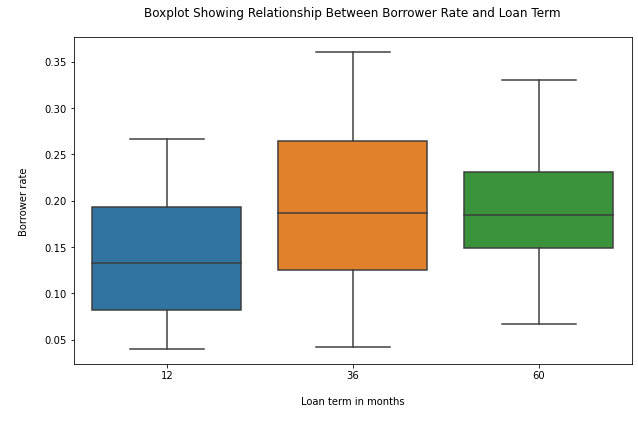

In [76]:
# box plot
sb.boxplot(data=df_clean, y='BorrowerRate', x='Term');

# 
plt.xlabel("\nLoan term in months\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxplot Showing Relationship Between Borrower Rate and Loan Term\n')
plt.show();

The chart above shows that users with __*36*__ months have a widder range of values from __*0.05*__ to above __*0.35*__ applicants with shorter loan duration have on average a lower loan interest rate than users with a longer term so loan term duration seems to have a relationship to interest rate.

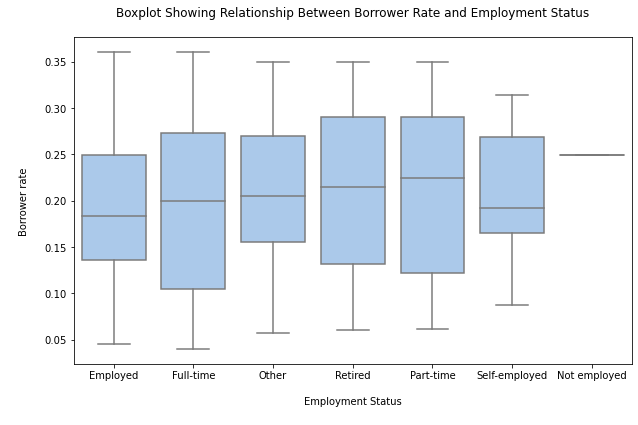

In [77]:
# get the freq to order the heights
freq = df_clean.EmploymentStatus.value_counts().index

# box plot
sb.boxplot(data=df_clean, y='BorrowerRate', x='EmploymentStatus', order=freq, color=palette_base[0]);

# 
plt.xlabel("\nEmployment Status\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxplot Showing Relationship Between Borrower Rate and Employment Status\n')
plt.show();

The chart above shows that applicants that indicated full employment of some sort had a lower interest rate on average than `Part-time`, `Retired`, or `Not employed` applicants. It is also interesting to note that applicants that identified as `Self-employed` had an almost similar rate average to `Employed` applicants.

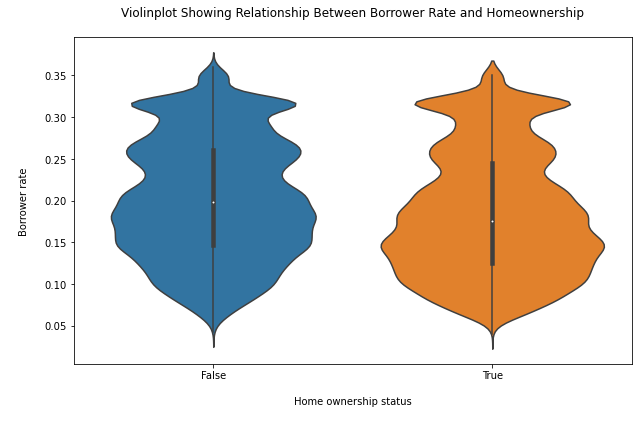

In [78]:
sb.violinplot(data=df_clean, y='BorrowerRate', x='IsBorrowerHomeowner');

# 
plt.xlabel("\nHome ownership status\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Violinplot Showing Relationship Between Borrower Rate and Homeownership\n')
plt.show();

A clear distinction in the above chart is that average interest rates are lower for applicants that are home owners.

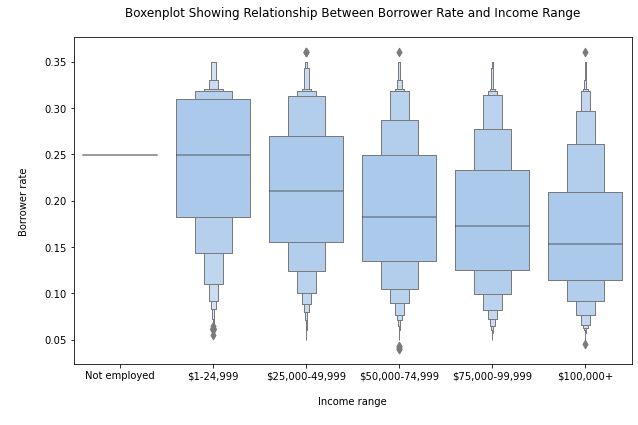

In [79]:
sb.boxenplot(data=df_clean, y='BorrowerRate', x='IncomeRange', color=palette_base[0]);

# 
plt.xlabel("\nIncome range\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxenplot Showing Relationship Between Borrower Rate and Income Range\n')
plt.show();

We observed in the chart above that applicants with a lower income range, on average, have a higher interest rate than applicants with higher income range who have a consistent lower average interest rate. So we can conclude that applicants with higher economic status usually have lower interest rates.

We now turn our attention to how credit scores and risk grades affect the loan rates.

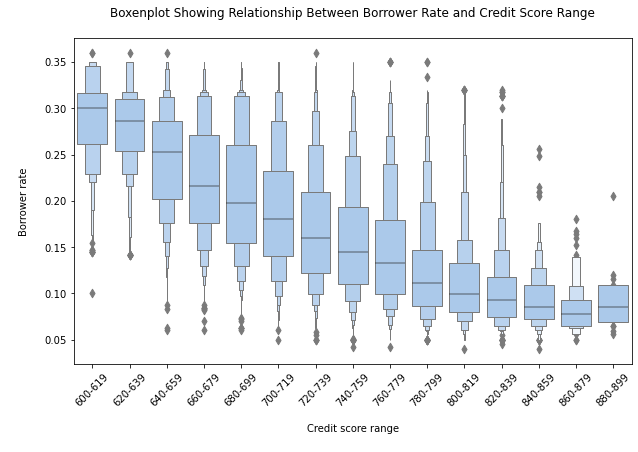

In [80]:
sb.boxenplot(data=df_clean, y='BorrowerRate', x='CreditScoreRange', color=palette_base[0])

# 
plt.xlabel("\nCredit score range\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxenplot Showing Relationship Between Borrower Rate and Credit Score Range\n')
plt.xticks(rotation=45)
plt.show();

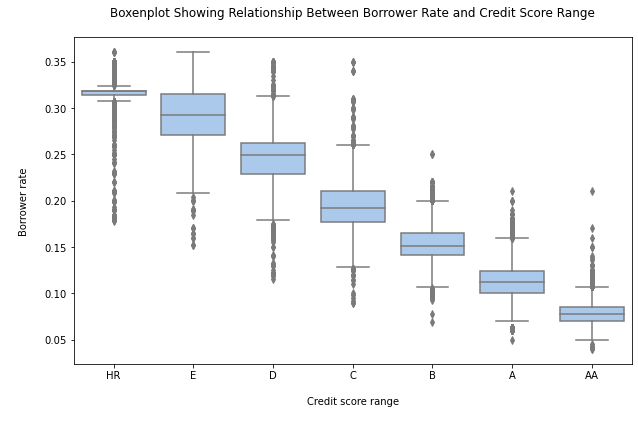

In [81]:
sb.boxplot(data=df_clean, y='BorrowerRate', x='ProsperRating', color=palette_base[0])

# 
plt.xlabel("\nCredit score range\n")
plt.ylabel('\nBorrower rate\n')
plt.title('Boxenplot Showing Relationship Between Borrower Rate and Credit Score Range\n')
# plt.xticks(rotation=45)
plt.show();

As expected from the above chart and the previous chart we see a good indication that the rate for each loan is reduced as the `CreditScoreRange` or the `ProsperRating` scores increases. Therefore, the risk and credit score of each applicant has an effect on the interest rate for such applicant.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Looking at how the `BorrowerRate` is related with applicant's economic status, economic status as represented by the `IncomeRange`, `IsBorrowerHomeowner`, and `EmploymentStatus` features, we see that the better the economic status of the applicant, the lower the `BorrowerRate`.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Concerning the loan `Term` duration we observed that applicants with a term of __*36*__ months have a wider range of values from __*0.05*__ to above __*0.35*__ while applicants with shorter loan duration of __*12*__ months have on average a lower loan interest rate than users with a longer term.